<a href="https://colab.research.google.com/github/xxxcrttt/CASA0018----DLSN/blob/main/workshop/ws6/6_1_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transfer Learning** 迁移学习

* is a research problem in ML that focuses on storing knowlegde gained while solving one problem and apply it to a different but related problem. 

* [VGG16](https://arxiv.org/abs/1409.1556) model was develiped by the Visual Graphics Group(VGG) at Oxford, the model expects color input images to be rescaled to the size of (224 x 224) pixels. 

以VGG开头的卷积网络模型，可应用在人脸识别，图像分类等方面，初衷是搞清楚卷积网络深度是如何影响大规模的图像分类与识别的精度和准确率的。

VGG在加深网络层数的同时为了避免参数过多，在所有层都采用 (3 x 3) 的小卷积核，卷积层步长被设置为 1. 输入被设置为 (224 x 224) 大小的 RGB 图像，在训练集图像上计算 RGB 均值，然后将图像作为输入传入VGG的卷积网络，使用 (3 x 3) or (1 x 1) filter， 步长被固定为 1


In [1]:
# example of loading the VGG16 model 
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model 
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

**other models**
* [ResNet50](https://keras.io/api/applications/resnet/)
* [InceptionV3](https://keras.io/api/applications/inceptionv3/)

## How to use the pre-trained models 

### Simple classifer -- no transfer leaning 
'D_Arlo.jpeg'

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load an image from file
image = load_img('D_Arlo.jpeg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
p = model.predict(image)
# convert the probabilities to class labels
lst = decode_predictions(p, top=3)
print(lst)

for label in lst[0]:
  # print(label)
  print('I think this is a %s and I am %.2f%% confident.' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
[[('n02101556', 'clumber', 0.9254365), ('n02102318', 'cocker_spaniel', 0.042445745), ('n02100735', 'English_setter', 0.02304878)]]
I think this is a clumber and I am 92.54% confident.
I think this is a cocker_spaniel and I am 4.24% confident.
I think this is a English_setter and I am 2.30% confident.


### Adding Transfer Learning 


In [4]:
# download the data 
!wget --no-check-certificate \
    https://github.com/ucl-casa-ce/casa0018/blob/main/Week6/data/validating.zip?raw=true \
    -O /content/validating.zip
  
!wget --no-check-certificate \
    https://github.com/ucl-casa-ce/casa0018/blob/main/Week6/data/training.zip?raw=true \
    -O /content/training.zip

--2022-02-23 19:24:57--  https://github.com/ucl-casa-ce/casa0018/blob/main/Week6/data/validating.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ucl-casa-ce/casa0018/raw/main/Week6/data/validating.zip [following]
--2022-02-23 19:24:58--  https://github.com/ucl-casa-ce/casa0018/raw/main/Week6/data/validating.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ucl-casa-ce/casa0018/main/Week6/data/validating.zip [following]
--2022-02-23 19:24:58--  https://raw.githubusercontent.com/ucl-casa-ce/casa0018/main/Week6/data/validating.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:

In [5]:
# copy the data to the content folder in Colab
import os
import zipfile

local_zip = '/content/training.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

local_zip = '/content/validating.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [6]:
# show some images

mugs_dir = os.path.join('/content/training/mugs')
plant_dir = os.path.join('/content/training/plant')
unknown_dir = os.path.join('/content/training/unknown')

print('total training mugs images:', len(os.listdir(mugs_dir)))
print('total training plants images:', len(os.listdir(plant_dir)))
print('total training unknown images:', len(os.listdir(unknown_dir)))

mugs_files = os.listdir(mugs_dir)
print(mugs_files[:10])

plant_files = os.listdir(plant_dir)
print(plant_files[:10])

unknown_files = os.listdir(unknown_dir)
print(unknown_files[:10])

total training mugs images: 37
total training plants images: 23
total training unknown images: 50
['mugs.1pnkfr4o.ingestion-6cd7bdcf6c-mfj7c.jpg', 'mugs.1pnki0bs.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnki3lc.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnkeb1s.ingestion-6cd7bdcf6c-mfj7c.jpg', 'mugs.1pnkg6ai.ingestion-6cd7bdcf6c-bw4kh.jpg', 'mugs.1pnkgks8.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnki4lq.ingestion-6cd7bdcf6c-bw4kh.jpg', 'mugs.1pnkgab3.ingestion-6cd7bdcf6c-bw4kh.jpg', 'mugs.1pnkfpjf.ingestion-6cd7bdcf6c-bw4kh.jpg', 'mugs.1pnkef3c.ingestion-6cd7bdcf6c-bw4kh.jpg']
['plant.1pnk9lj4.ingestion-6cd7bdcf6c-bw4kh.jpg', 'plant.1pnkbgn0.ingestion-6cd7bdcf6c-bw4kh.jpg', 'plant.1pnkc9cn.ingestion-6cd7bdcf6c-bw4kh.jpg', 'plant.1pnk9flu.ingestion-6cd7bdcf6c-mfj7c.jpg', 'plant.1pnkcfhe.ingestion-6cd7bdcf6c-vcclp.jpg', 'plant.1pnkcelh.ingestion-6cd7bdcf6c-mfj7c.jpg', 'plant.1pnka8oa.ingestion-6cd7bdcf6c-bw4kh.jpg', 'plant.1pnkbt9n.ingestion-6cd7bdcf6c-mfj7c.jpg', 'plant.1pnkbj6e.ingestion-6c

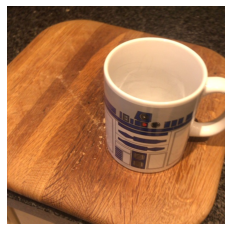

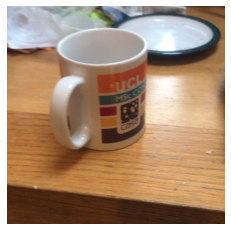

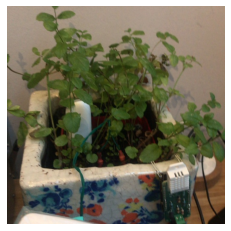

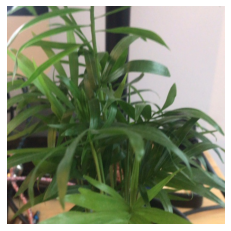

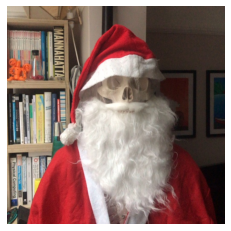

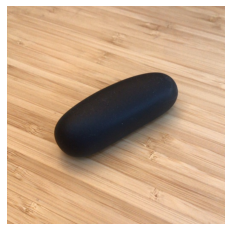

In [7]:
# display some images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_mugs = [os.path.join(mugs_dir, fname) 
                for fname in mugs_files[0:pic_index]]
next_plant = [os.path.join(plant_dir, fname) 
                for fname in plant_files[0:pic_index]]
next_unknown = [os.path.join(unknown_dir, fname) 
                for fname in unknown_files[0:pic_index]]

for i, img_path in enumerate(next_mugs+next_plant+next_unknown):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Use transfer learning to create new model 

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras.applications.vgg16 import VGG16
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# ImageDataGenerator: 就地扩充 -- 用转换后的集合替换过去的一批图像
# 意味着当网络被训练时，每个epoch都会看到图像新的变化
TRAINING_DIR = "/content/training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/validating/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

label_map = (train_generator.class_indices)
print("Classes found in data are: ", label_map)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 110 images belonging to 3 classes.
Classes found in data are:  {'mugs': 0, 'plant': 1, 'unknown': 2}
Found 30 images belonging to 3 classes.


In [9]:
# use a pretrained model to build new model 

# defining a variable to hold image since since it is called in few places below
IMAGE_SIZE = [150, 150]

# load model without classifier layers

pretrained_model = VGG16(weights='imagenet', 
                         include_top=False ,
                         input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = MobileNetV2(input_shape=[*IMAGE_SIZE, 3], 
#                               include_top=False)
#pretrained_model = ResNet50(weights='imagenet', 
#                            include_top=False, 
#                            input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = MobileNet(weights='imagenet', 
#                             include_top=False, 
#                             input_shape=[*IMAGE_SIZE, 3])

pretrained_model.trainable = False

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 3)                 24579     
                                                                 
Total params: 14,739,267
Trainable params: 24,579
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
# run the training and save to history to plot metrics
history = model.fit(train_generator, 
                    epochs=20, 
                    validation_data = validation_generator, 
                    verbose = 1)

# we can save the model so that we can reload at a later date
# It appears in the content folder - download it before your session ends
# https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("mugsplant.h5")

Epoch 1/20
1/1 [==============================] - 31s 31s/step - loss: 1.0517 - accuracy: 0.4818 - val_loss: 0.8232 - val_accuracy: 0.4667
Epoch 2/20
1/1 [==============================] - 30s 30s/step - loss: 0.9404 - accuracy: 0.5000 - val_loss: 0.5284 - val_accuracy: 0.9333
Epoch 3/20
1/1 [==============================] - 29s 29s/step - loss: 0.7070 - accuracy: 0.7727 - val_loss: 0.3801 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 29s 29s/step - loss: 0.5718 - accuracy: 0.8455 - val_loss: 0.3121 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 29s 29s/step - loss: 0.4937 - accuracy: 0.8273 - val_loss: 0.2585 - val_accuracy: 0.9333
Epoch 6/20
1/1 [==============================] - 29s 29s/step - loss: 0.4281 - accuracy: 0.8727 - val_loss: 0.2048 - val_accuracy: 0.9333
Epoch 7/20
1/1 [==============================] - 29s 29s/step - loss: 0.4207 - accuracy: 0.8273 - val_loss: 0.1497 - val_accuracy: 1.0000
Epoch 8/20
1/1 [===========

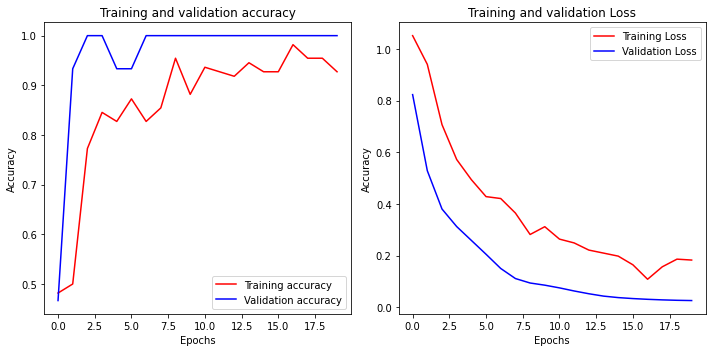

In [11]:
# plot the result 
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.subplot(1, 2, 2)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.tight_layout()

## Testing the model 

upload and classify an image

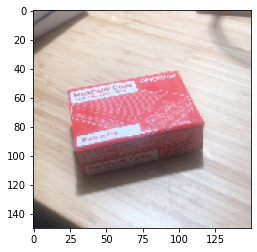

I think the image above is "unknown" and I am 100.00% confident.
[0. 0. 1.]


In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

# load an image from file
img = load_img('3.jpeg', target_size=(150, 150))

plt.imshow(img)
plt.show()

# convert to an array that we can use as input to our model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# run prediction
p = model.predict(images)
  
# create a look up of the class labels generated from the 
# "flow_from_directory" method used in the generator and print result
predicted_class_indices = np.argmax(model.predict(x), axis=-1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

print('I think the image above is "%s" and I am %.2f%% confident.' % (predictions[0], p[0][predicted_class_indices]*100))

print(p[0])